In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [4]:
url = '../data/clean/combined_data_test.txt'
df = pd.read_csv(url)

In [5]:
df.head(10)

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9999832,145538019_54444341400,472154369_16714624241_585315,step_1,2017-05-16 16:46:11,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,Test
1,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0,Test
2,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
3,9999729,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
4,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
5,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
6,9999729,834634258_21862004160,870243567_56915814033_814203,step_1,2017-05-08 16:08:30,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
7,9999729,834634258_21862004160,870243567_56915814033_814203,start,2017-05-08 16:08:25,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
8,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test
9,9999729,843385170_36953471821,493310979_9209676464_421146,step_2,2017-04-20 14:27:36,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test


In [6]:
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort by client_id and date_time to ensure the steps are in chronological order
df = df.sort_values(by=['client_id', 'date_time'])

# Define the process steps in the correct order
process_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Create a new column that shows the next step
df['next_step'] = df.groupby('client_id')['process_step'].shift(-1)

# Create a column to identify "step back" (where the next step is lower in the process order)
df['is_step_back'] = df.apply(lambda row: process_order.index(row['next_step']) < process_order.index(row['process_step']) 
                              if pd.notnull(row['next_step']) else False, axis=1)

# Count the number of "step back" errors
step_back_errors = df['is_step_back'].sum()

# Display the rows with step back errors
step_back_rows = df[df['is_step_back'] == True]

print(f"Number of step back errors: {step_back_errors}")
step_back_rows

Number of step back errors: 19084


,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,next_step,is_step_back
176614,1346,123474046_4204671056,27144337_83739845380_214282,step_1,2017-06-06 18:20:36,14.0,177.0,46.0,F,2.0,822512.91,3.0,6.0,Test,start,True
176611,1346,123474046_4204671056,27144337_83739845380_214282,step_3,2017-06-06 18:24:50,14.0,177.0,46.0,F,2.0,822512.91,3.0,6.0,Test,start,True
176596,1516,182314299_63168583136,481123290_95510977345_707323,step_2,2017-04-05 15:54:39,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,step_1,True
176595,1516,182314299_63168583136,481123290_95510977345_707323,step_2,2017-04-05 15:56:00,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,start,True
176594,1516,182314299_63168583136,481123290_95510977345_707323,step_2,2017-04-05 15:57:28,12.0,150.0,58.5,F,2.0,25408.39,5.0,8.0,Test,step_1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,9995295,719082482_48238561745,944432037_72425410366_517931,step_1,2017-03-29 11:18:50,33.0,397.0,58.0,U,2.0,166663.77,2.0,5.0,Test,start,True
44,9998156,255983388_34400418109,254203981_1117450921_444839,step_3,2017-04-02 23:44:13,8.0,98.0,25.5,U,2.0,31723.51,5.0,8.0,Test,step_2,True
20,9999150,665127594_52605538620,982803842_91891255980_123078,step_1,2017-05-29 16:55:18,5.0,66.0,30.0,U,3.0,97141.71,6.0,9.0,Test,start,True
2,9999729,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0,Test,start,True


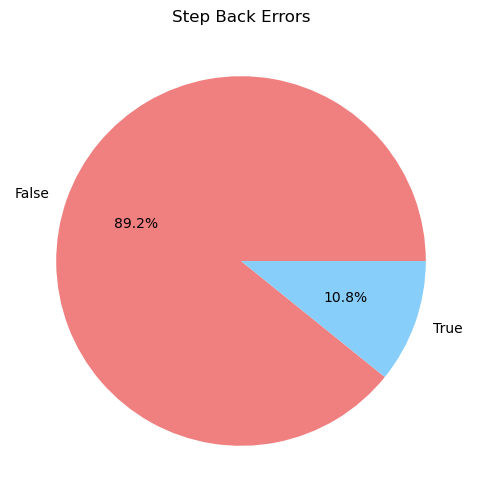

In [8]:
step_back_counts = df['is_step_back'].value_counts()

# Plot pie chart for step back counts
plt.figure(figsize=(6,6))
plt.pie(step_back_counts, labels=step_back_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Step Back Errors')
plt.savefig('step_back_errors_pie_chart.png', format='png')

In [12]:
# Step 1: Filter and get the last 'start' and 'confirm' time for each client
start_df = df[df['process_step'] == 'start'].sort_values('date_time').groupby('client_id').tail(1)[['client_id', 'date_time']].rename(columns={'date_time': 'start_time'})
confirm_df = df[df['process_step'] == 'confirm'].sort_values('date_time').groupby('client_id').tail(1)[['client_id', 'date_time']].rename(columns={'date_time': 'confirm_time'})

# Step 2: Merge the two DataFrames on client_id
merged_df = pd.merge(start_df, confirm_df, on='client_id', how='left')  # use 'left' to keep all clients with 'start' step

# Step 3: Calculate the process time (confirm_time - start_time) in minutes
merged_df['process_duration'] = (merged_df['confirm_time'] - merged_df['start_time']).dt.total_seconds() / 60  # Convert to minutes

# Step 4: Handle customers who did not finish the process (no 'confirm' step)
# Customers without a confirm step will have NaN in 'process_duration'
merged_df['process_duration'] = merged_df['process_duration'].fillna('Not Completed')  # Or use any other placeholder for missing process durations

# Show the result with process duration for each client
merged_df[['client_id', 'start_time', 'confirm_time', 'process_duration']]

,client_id,start_time,confirm_time,process_duration
0,4192640,2017-03-15 00:44:38,NaT,Not Completed
1,6752370,2017-03-15 05:43:13,NaT,Not Completed
2,2685910,2017-03-15 07:47:11,2017-03-15 07:50:33,3.366667
3,5616882,2017-03-15 10:16:59,NaT,Not Completed
4,7794004,2017-03-15 11:03:20,2017-03-15 11:10:28,7.133333
...,...,...,...,...
26667,4296369,2017-06-20 22:39:50,NaT,Not Completed
26668,351901,2017-06-20 22:40:09,2017-06-20 22:44:04,3.916667
26669,7107441,2017-06-20 23:10:44,NaT,Not Completed
26670,6800679,2017-06-20 23:14:06,NaT,Not Completed


In [13]:
df.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts',
       'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation', 'next_step',
       'is_step_back'],
      dtype='object')

In [14]:
df.columns = ['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'tenure_year', 'tenure_month', 'age', 'gender', 'num_accounts',
       'balance', 'calls_6_months', 'logons_6_months', 'variation', 'next_step',
       'is_step_back']
df.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'tenure_year', 'tenure_month', 'age', 'gender', 'num_accounts',
       'balance', 'calls_6_months', 'logons_6_months', 'variation',
       'next_step', 'is_step_back'],
      dtype='object')

In [15]:
df.describe()
# 9 numerical columns 

,client_id,date_time,tenure_year,tenure_month,age,num_accounts,balance,calls_6_months,logons_6_months
count,1.766410e+05,176641,176641.000000,176641.000000,176641.000000,176641.000000,1.766410e+05,176641.000000,176641.000000
mean,5.007069e+06,2017-04-18 04:52:59.435668992,12.182025,152.227410,48.722216,2.253690,1.623231e+05,3.201986,6.242124
min,5.550000e+02,2017-03-15 00:43:23,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.508516e+06,2017-04-03 16:23:18,6.000000,82.000000,35.000000,2.000000,4.100530e+04,1.000000,4.000000
50%,5.061874e+06,2017-04-12 11:29:56,11.000000,138.000000,50.500000,2.000000,6.929065e+04,3.000000,6.000000
75%,7.475920e+06,2017-04-23 21:32:56,16.000000,193.000000,61.000000,2.000000,1.526703e+05,6.000000,9.000000
max,9.999832e+06,2017-06-20 23:21:23,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000
std,2.879062e+06,NaN,6.940522,82.955476,15.646423,0.532044,3.684109e+05,2.201277,2.186744


In [17]:
df.select_dtypes("object").columns
# 6 columns no numerical 

Index(['visitor_id', 'visit_id', 'process_step', 'gender', 'variation',
       'next_step'],
      dtype='object')

In [19]:
df.isnull().sum().sort_values(ascending=False)
# We only have missing values in Next_step 

next_step          26961
client_id              0
visitor_id             0
visit_id               0
process_step           0
date_time              0
tenure_year            0
tenure_month           0
age                    0
gender                 0
num_accounts           0
balance                0
calls_6_months         0
logons_6_months        0
variation              0
is_step_back           0
dtype: int64

In [25]:
# Frequency table
frequency_table = df['process_step'].value_counts()

# Calculating the proportion of each unique value
proportion_table = df['process_step'].value_counts(normalize=True)

frequency_table, proportion_table

(process_step
 start      55753
 step_1     38651
 step_2     30888
 step_3     25755
 confirm    25594
 Name: count, dtype: int64,
 process_step
 start      0.315629
 step_1     0.218811
 step_2     0.174863
 step_3     0.145804
 confirm    0.144893
 Name: proportion, dtype: float64)

In [28]:
frequency_table2 = df['next_step'].value_counts()

# Calculating the proportion of each unique value in the 'MSZoning'
proportion_table2 = df['next_step'].value_counts(normalize=True)

frequency_table2, proportion_table2

(next_step
 step_1     38562
 step_2     30882
 start      29140
 step_3     25728
 confirm    25368
 Name: count, dtype: int64,
 next_step
 step_1     0.257630
 step_2     0.206320
 start      0.194682
 step_3     0.171887
 confirm    0.169482
 Name: proportion, dtype: float64)

In [30]:
my_table = pd.crosstab(index = df["process_step"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table
(my_table/my_table.sum()).round(2)

col_0,count
process_step,
confirm,0.14
start,0.32
step_1,0.22
step_2,0.17
step_3,0.15


In [32]:
my_table2 = pd.crosstab(index = df["next_step"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table2
(my_table2/my_table2.sum()).round(2)

col_0,count
next_step,
confirm,0.17
start,0.19
step_1,0.26
step_2,0.21
step_3,0.17


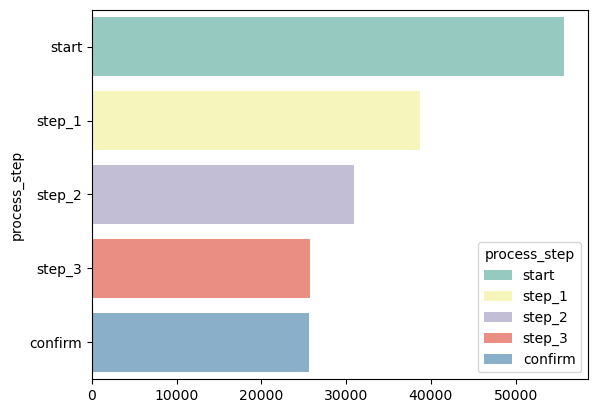

In [34]:
ax=sns.barplot(y=frequency_table.index, x=frequency_table.values, palette="Set3", hue=frequency_table.index, legend='full')
sns.move_legend(ax, "lower right")

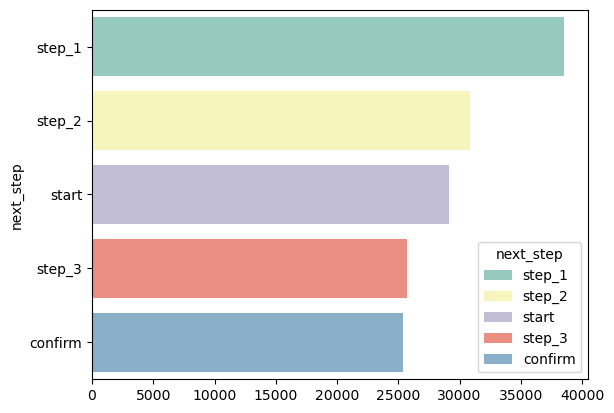

In [36]:
ax=sns.barplot(y=frequency_table2.index, x=frequency_table2.values, palette="Set3", hue=frequency_table2.index, legend='full')
sns.move_legend(ax, "lower right")

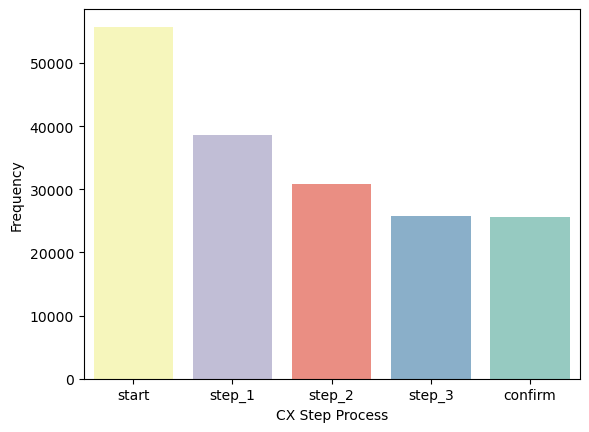

In [38]:
fig, axes = plt.subplots()
sns.barplot(x=my_table.index, y=my_table["count"], palette="Set3",hue=my_table.index, legend=False
            ,order=['start', 'step_1', 'step_2','step_3','confirm'],ax=axes)
axes.set_ylabel("Frequency")
axes.set_xlabel("CX Step Process")
plt.show()

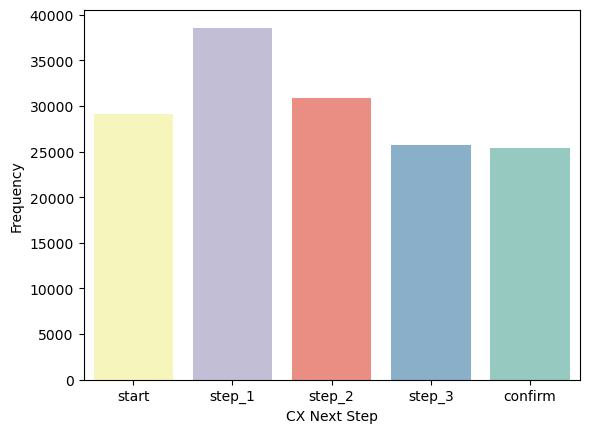

In [40]:
fig, axes = plt.subplots()
sns.barplot(x=my_table2.index, y=my_table2["count"], palette="Set3",hue=my_table2.index, legend=False
            ,order=['start', 'step_1', 'step_2','step_3','confirm'],ax=axes)
axes.set_ylabel("Frequency")
axes.set_xlabel("CX Next Step")
plt.show()

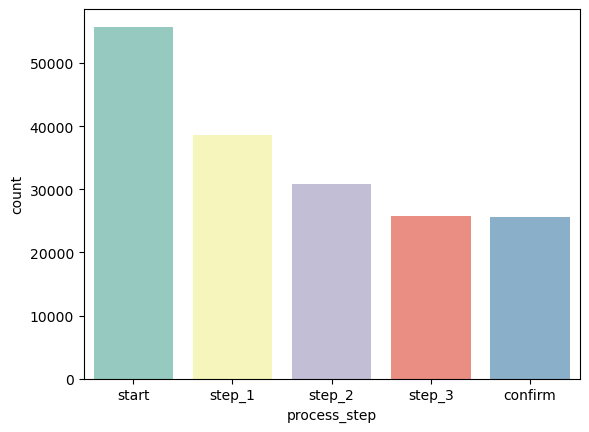

In [42]:
sns.countplot(data=df, x='process_step', palette="Set3", hue='process_step', legend=False);

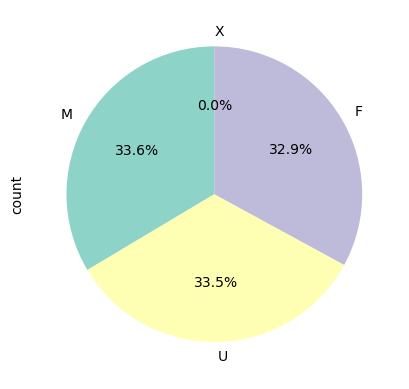

In [43]:
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));
# U means Unknown

In [46]:
df.describe()

,client_id,date_time,tenure_year,tenure_month,age,num_accounts,balance,calls_6_months,logons_6_months
count,1.766410e+05,176641,176641.000000,176641.000000,176641.000000,176641.000000,1.766410e+05,176641.000000,176641.000000
mean,5.007069e+06,2017-04-18 04:52:59.435668992,12.182025,152.227410,48.722216,2.253690,1.623231e+05,3.201986,6.242124
min,5.550000e+02,2017-03-15 00:43:23,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.508516e+06,2017-04-03 16:23:18,6.000000,82.000000,35.000000,2.000000,4.100530e+04,1.000000,4.000000
50%,5.061874e+06,2017-04-12 11:29:56,11.000000,138.000000,50.500000,2.000000,6.929065e+04,3.000000,6.000000
75%,7.475920e+06,2017-04-23 21:32:56,16.000000,193.000000,61.000000,2.000000,1.526703e+05,6.000000,9.000000
max,9.999832e+06,2017-06-20 23:21:23,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000
std,2.879062e+06,NaN,6.940522,82.955476,15.646423,0.532044,3.684109e+05,2.201277,2.186744


In [48]:
# Measures of centrality of the column balance: 
mean_balance = df['balance'].mean()
median_balance = df['balance'].median()
mode_balance = df['balance'].mode()[0]


print(mean_balance)
print(median_balance)
print(mode_balance)

162323.08600092842
69290.65
87107.79000000001


In [50]:
# Measures of dispersion of the column balance: 
variance_balance = df['balance'].var()
std_dev_balance = df['balance'].std()
min_balance = df['balance'].min()
max_balance = df['balance'].max()
range_balance = max_balance - min_balance
quantiles_balance = df['balance'].quantile([0.25, 0.5, 0.75])

print(variance_balance)
print(std_dev_balance)
print(min_balance)
print(max_balance)
print(range_balance)
print(quantiles_balance)

135726556259.43033
368410.85252667347
23789.44
16320040.15
16296250.71
0.25     41005.30
0.50     69290.65
0.75    152670.27
Name: balance, dtype: float64


In [52]:
skewness_price = df['balance'].skew()
kurtosis_price = df['balance'].kurtosis()

print(skewness_price)
print(kurtosis_price)

18.754484695639647
676.9168779884678


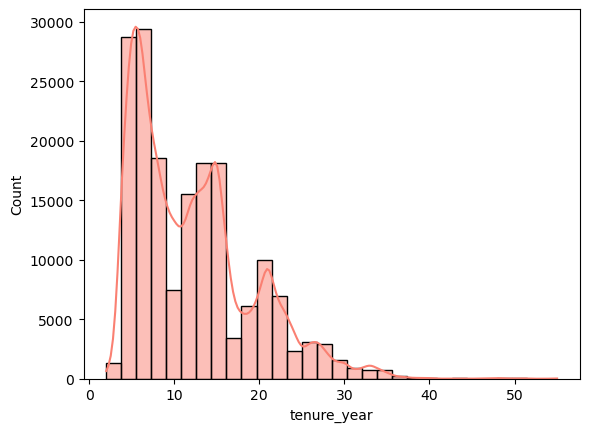

In [54]:
sns.histplot(df['tenure_year'], kde=True, bins=30, color="salmon");

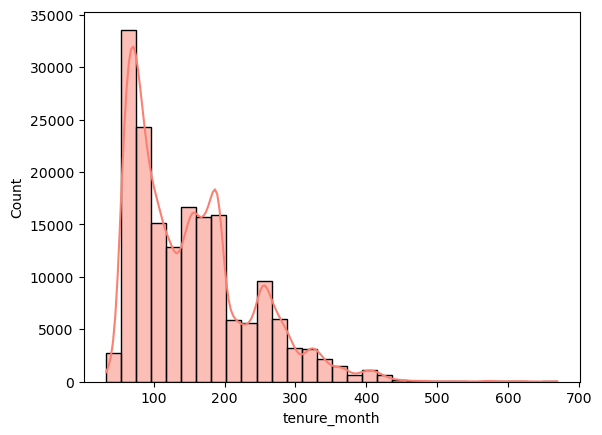

In [55]:
sns.histplot(df['tenure_month'], kde=True, bins=30, color="salmon");

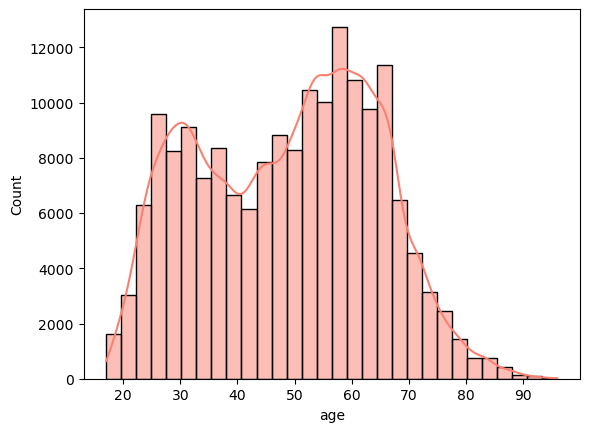

In [56]:
sns.histplot(df['age'], kde=True, bins=30, color="salmon");

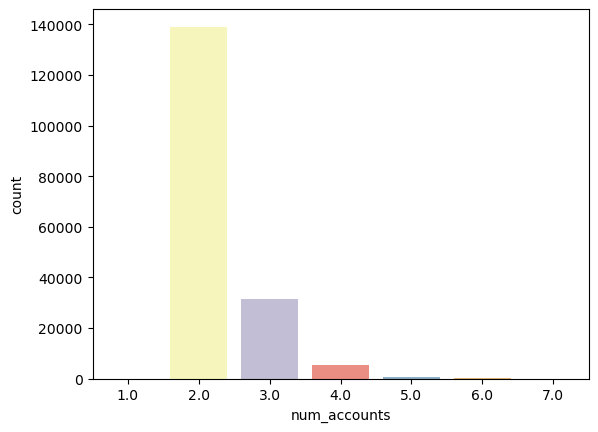

In [58]:
sns.countplot(data=df, x='num_accounts', palette="Set3", hue='num_accounts', legend=False);

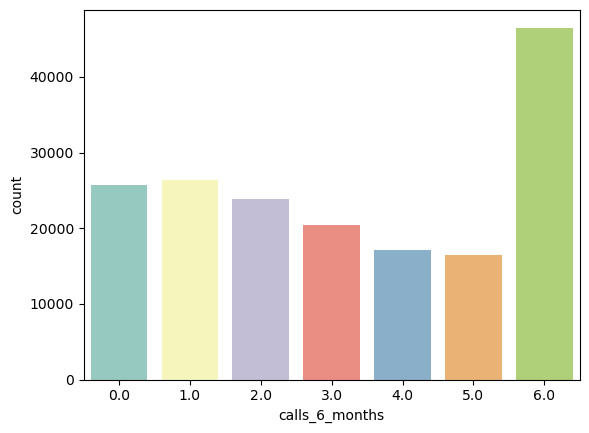

In [59]:
sns.countplot(data=df, x='calls_6_months', palette="Set3", hue='calls_6_months', legend=False);

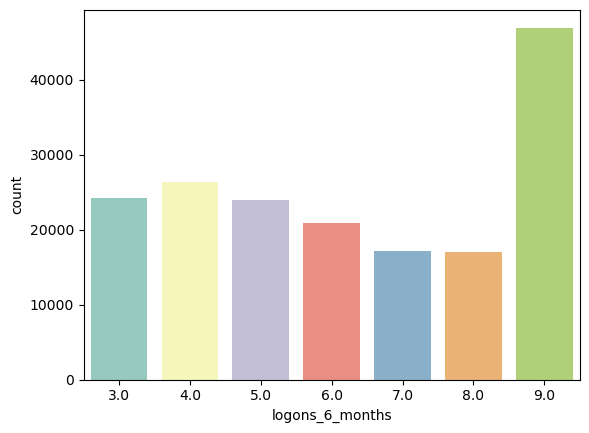

In [61]:
sns.countplot(data=df, x='logons_6_months', palette="Set3", hue='logons_6_months', legend=False);

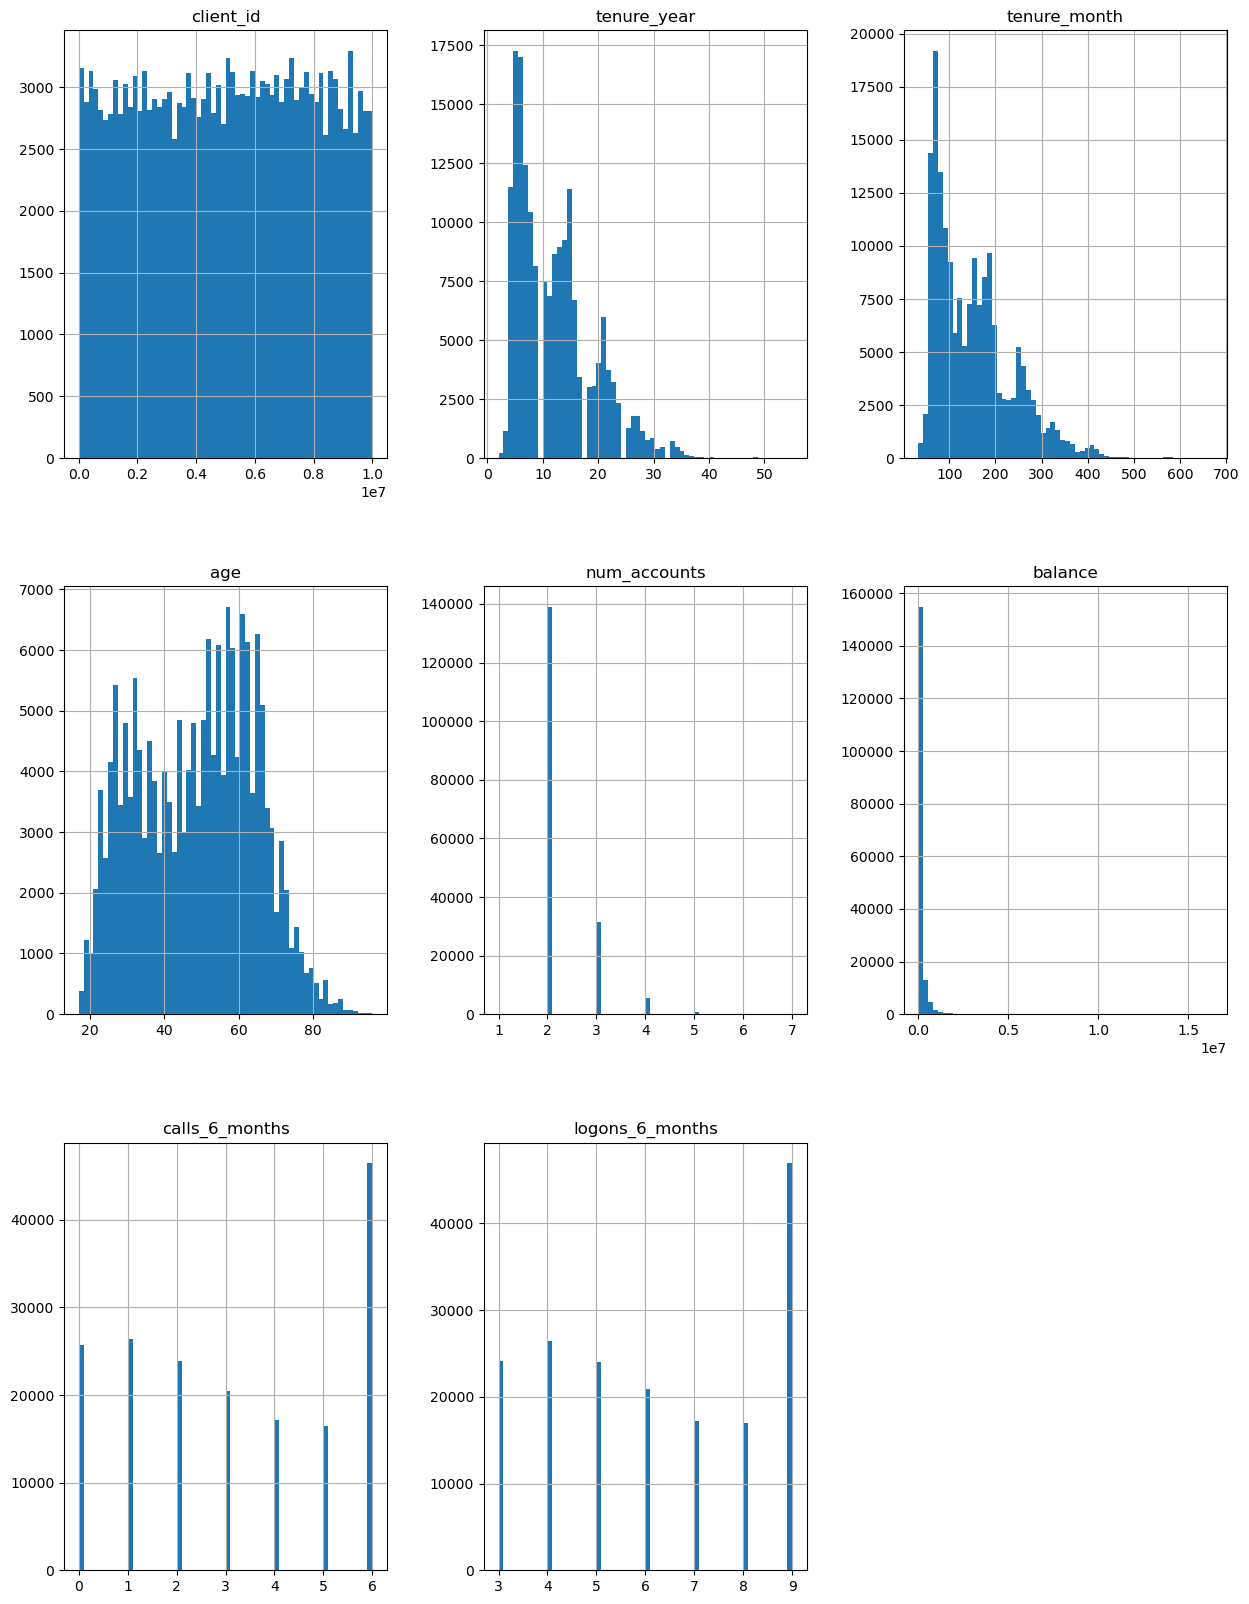

In [62]:
df_numerical = df.select_dtypes("number")
df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [64]:
# Define the quantiles (e.g., quartiles - 4 bins)
quantiles = [0, 0.25, 0.5, 0.75, 1.0]

# Use qcut to divide the data into quantiles
df['quantile'] = pd.qcut(df['balance'], q=quantiles, labels=["Q1", "Q2", "Q3", "Q4"])


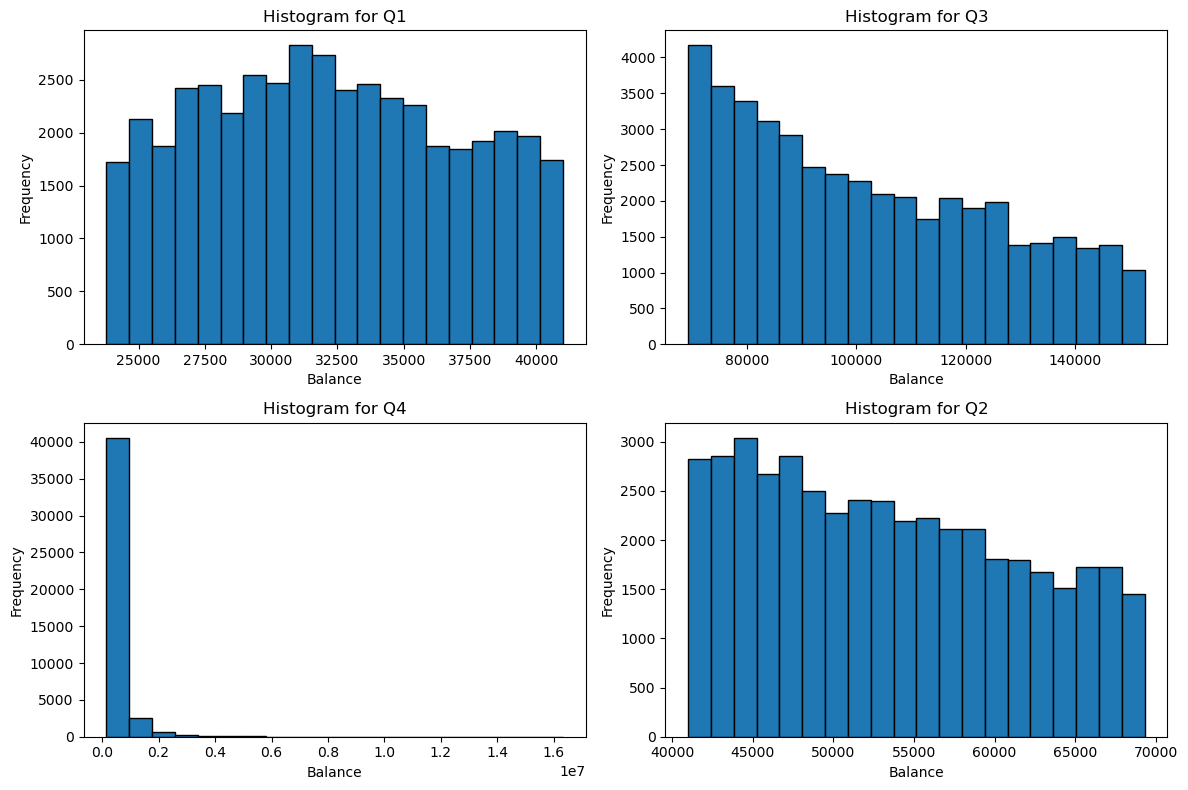

In [66]:
# Create subplots for each quantile
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each quantile and plot the histogram
for i, quantile in enumerate(df['quantile'].unique()):
    subset = df[df['quantile'] == quantile]
    axes[i].hist(subset['balance'], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram for {quantile}')
    axes[i].set_xlabel('Balance')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [67]:
bins = [0, 100000, 200000, 300000,df['balance'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['balance_category'] = pd.cut(df['balance'], bins=bins, labels=labels, include_lowest=True)

In [69]:
df.balance_category.value_counts()

balance_category
Low          111148
Medium        31656
Very High     21402
High          12435
Name: count, dtype: int64

In [71]:
df['balance_quantile'] = pd.qcut(df['balance'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df.balance_quantile.value_counts()

balance_quantile
Q3    44171
Q1    44161
Q2    44160
Q4    44149
Name: count, dtype: int64

In [72]:
df_filtered = df[df['quantile'] != 'Q4']

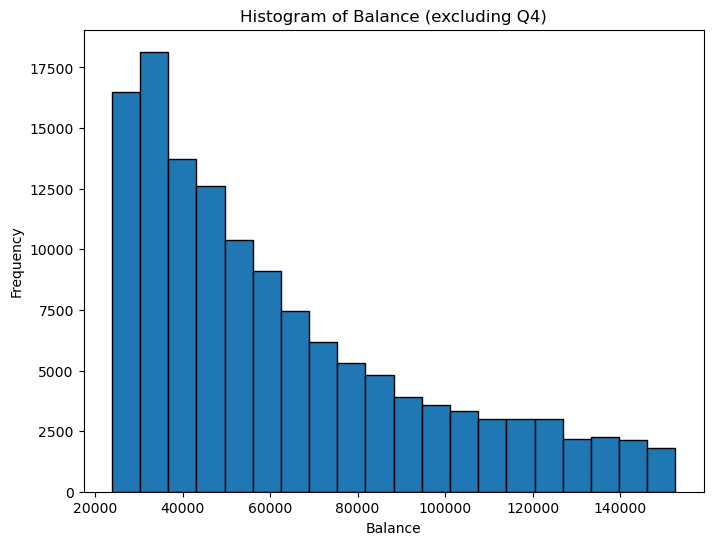

In [73]:
plt.figure(figsize=(8, 6))
plt.hist(df_filtered['balance'], bins=20, edgecolor='black')
plt.title('Histogram of Balance (excluding Q4)')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [74]:
crosstab1 = pd.crosstab(df['gender'], df['num_accounts'])

crosstab1

num_accounts,1.0,2.0,3.0,4.0,5.0,6.0,7.0
gender,,,,,,,
F,0,46970,9485,1505,177,26,6
M,0,43490,12765,2588,353,71,21
U,5,48555,9051,1478,87,0,0
X,0,8,0,0,0,0,0


In [77]:
crosstab2 = pd.crosstab(df['gender'], df['logons_6_months'])

crosstab2

logons_6_months,3.0,4.0,5.0,6.0,7.0,8.0,9.0
gender,,,,,,,
F,9183,9317,8584,7221,5925,5108,12831
M,6308,7688,7234,6527,5725,6808,18998
U,8681,9389,8189,7153,5566,5058,15140
X,0,3,0,0,0,0,5


In [78]:
crosstab3 = pd.crosstab(df['gender'], df['calls_6_months'])

crosstab3

calls_6_months,0.0,1.0,2.0,3.0,4.0,5.0,6.0
gender,,,,,,,
F,9936,9292,8516,7006,5856,4849,12714
M,6729,7629,7286,6452,5675,6722,18795
U,9091,9489,8105,6964,5585,4946,14996
X,0,3,0,0,0,0,5


In [81]:
crosstab4 = pd.crosstab(df['gender'], df['process_step'])

crosstab4

process_step,confirm,start,step_1,step_2,step_3
gender,,,,,
F,8151,18586,12825,10165,8442
M,8922,18698,12856,10218,8594
U,8521,18464,12967,10505,8719
X,0,5,3,0,0


In [87]:
crosstab4 = pd.crosstab(df['age'], df['process_step'])

crosstab4

process_step,confirm,start,step_1,step_2,step_3
age,,,,,
17.0,1,3,2,1,1
17.5,45,54,48,44,41
18.0,11,65,31,19,14
18.5,99,101,97,84,75
19.0,19,119,54,41,25
...,...,...,...,...,...
93.0,1,6,4,2,2
94.0,0,7,2,3,1
94.5,1,1,1,1,1


In [90]:
crosstab5 = pd.crosstab(df['age'], df['next_step'])

crosstab5

next_step,confirm,start,step_1,step_2,step_3
age,,,,,
17.0,1,2,2,1,1
17.5,45,21,48,44,41
18.0,11,33,31,19,14
18.5,99,32,97,84,75
19.0,19,70,52,41,25
...,...,...,...,...,...
93.0,1,5,4,2,2
94.0,0,5,2,3,1
94.5,1,0,1,1,1


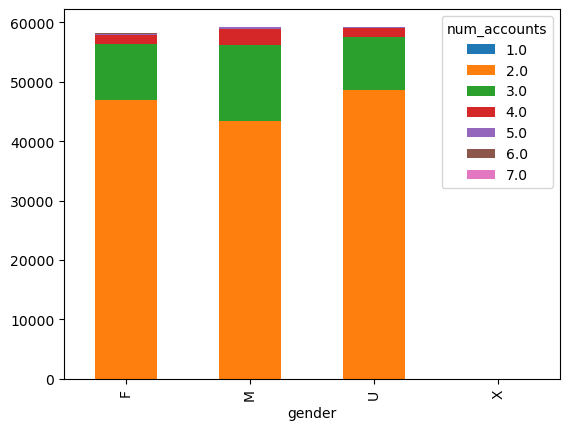

In [92]:
crosstab1.plot(kind="bar", stacked=True);

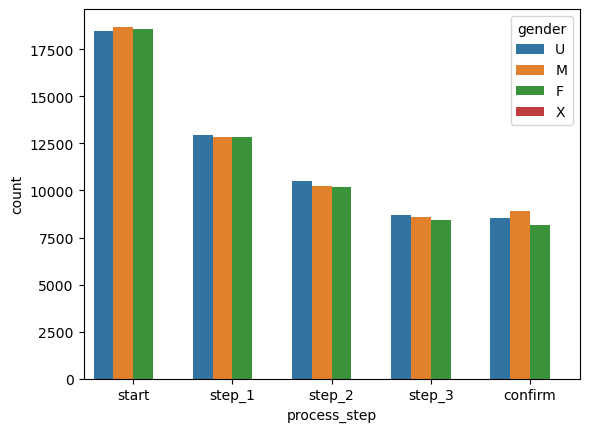

In [95]:
sns.countplot(data=df, x='process_step', hue='gender');

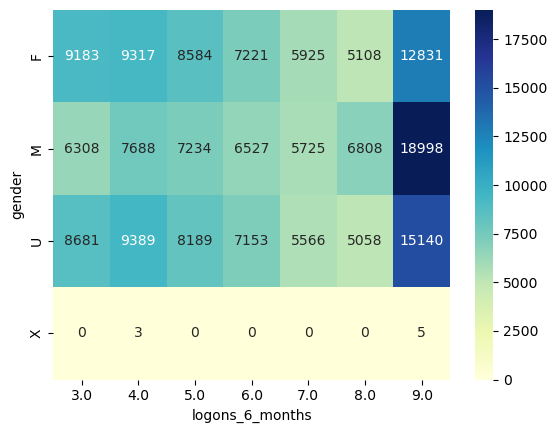

In [97]:
sns.heatmap(crosstab2, annot=True, cmap="YlGnBu", fmt="d");

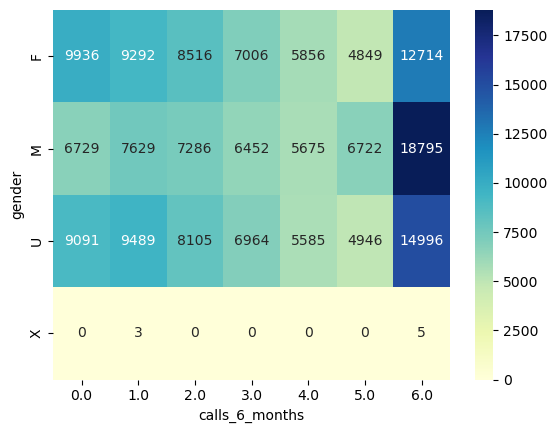

In [98]:
sns.heatmap(crosstab3, annot=True, cmap="YlGnBu", fmt="d");

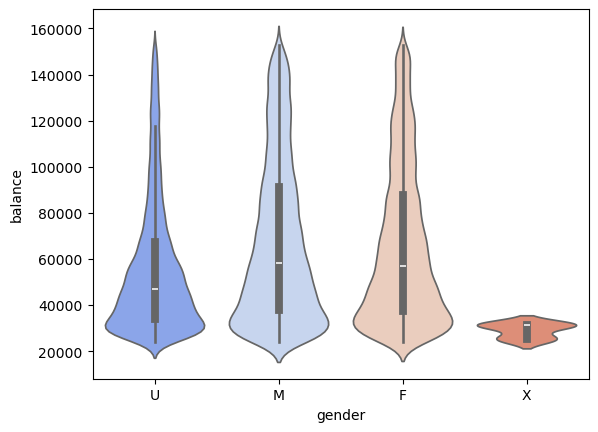

In [100]:
sns.violinplot(data=df_filtered, x='gender', y='balance', palette="coolwarm", hue='gender', legend=False);

In [102]:
df_filtered.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'tenure_year', 'tenure_month', 'age', 'gender', 'num_accounts',
       'balance', 'calls_6_months', 'logons_6_months', 'variation',
       'next_step', 'is_step_back', 'quantile', 'balance_category',
       'balance_quantile'],
      dtype='object')

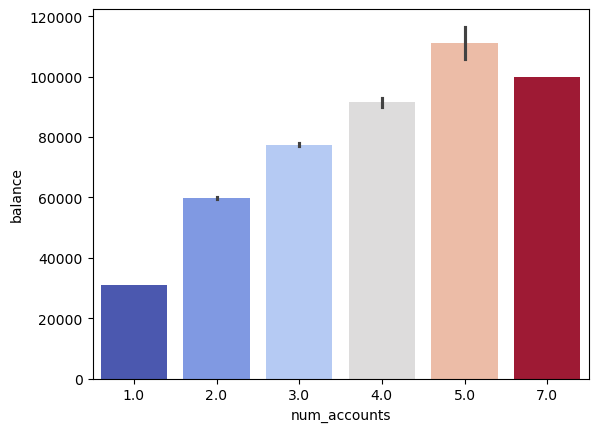

In [104]:
sns.barplot(data=df_filtered, x='num_accounts', y='balance', palette="coolwarm", hue='num_accounts', legend=False);

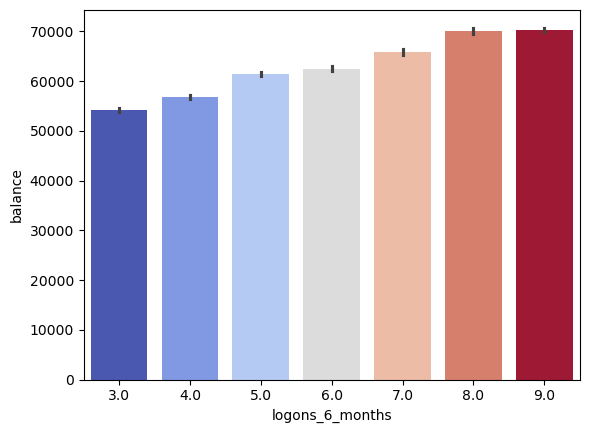

In [105]:
sns.barplot(data=df_filtered, x='logons_6_months', y='balance', palette="coolwarm", hue='logons_6_months', legend=False);

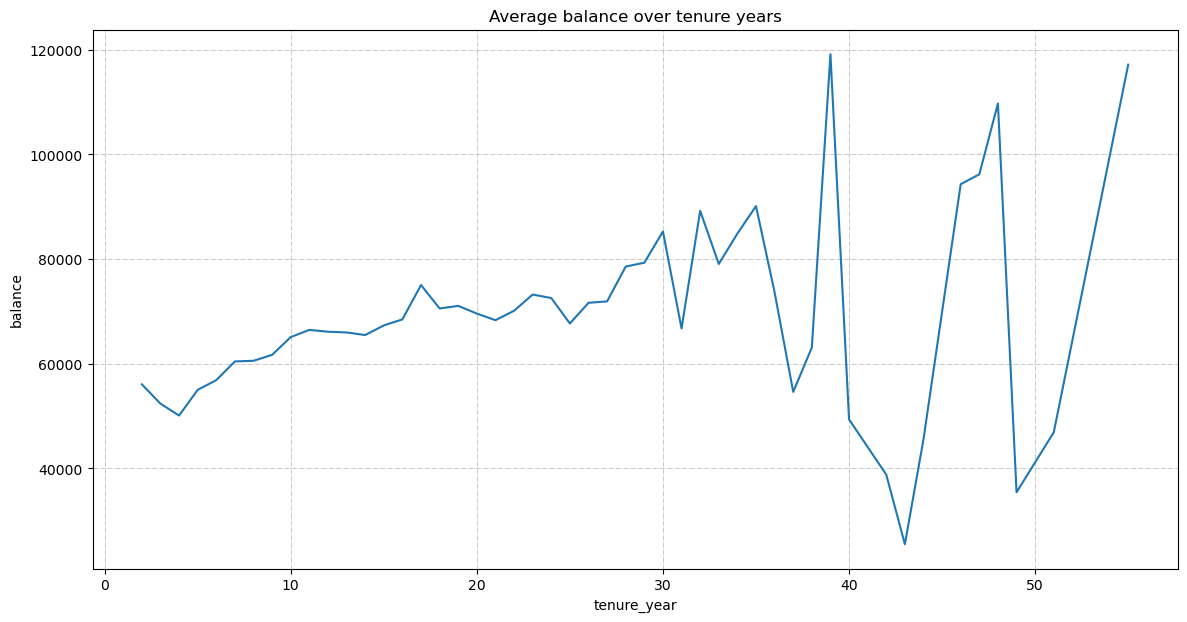

In [107]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtered, x='tenure_year', y='balance', errorbar=None);
plt.title('Average balance over tenure years')
plt.grid(True, which='both', linestyle='-.', linewidth=0.5)

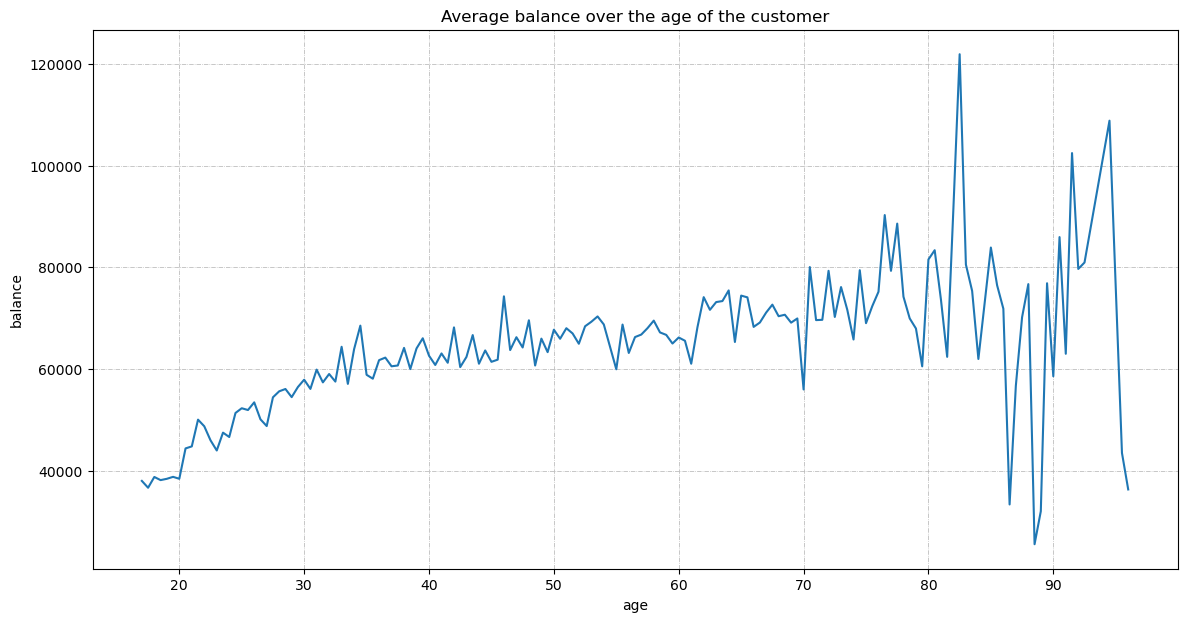

In [109]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtered, x='age', y='balance', errorbar=None);
plt.title('Average balance over the age of the customer')
plt.grid(True, which='both', linestyle='-.', linewidth=0.5)

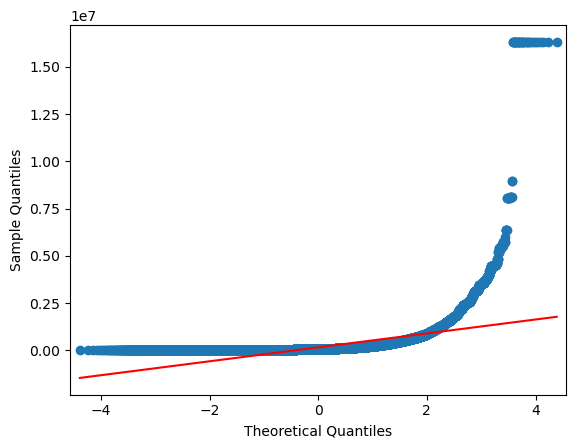

In [110]:
sm.qqplot(df['balance'], line='s');

In [111]:
# Convert the 'timestamp' column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

In [112]:
# Sort by user_id and timestamp (if not already sorted)
df = df.sort_values(by=['client_id','date_time'])

In [113]:
# Calculate the time difference between consecutive steps for each user
df['time_diff'] = df.groupby('client_id')['date_time'].diff()

In [115]:
# Now calculate the total time spent for each user by summing up the time differences
# If you want total time in seconds or minutes:
df['time_diff_seconds'] = df['time_diff'].dt.total_seconds()

In [116]:
# Calculate the total time per user (sum of time differences in seconds)
total_time_per_user_seconds = df.groupby('client_id')['time_diff_seconds'].sum()

In [117]:
# Convert the total time from seconds to a more readable format (e.g., minutes, hours)
total_time_per_user_minutes = total_time_per_user_seconds / 60
total_time_per_user_hours = total_time_per_user_seconds / 3600

In [120]:
total_time_per_user_hours

client_id
555          0.043889
647          0.104722
934          0.039444
1336         2.296667
1346         0.137500
              ...    
9999150      0.005000
9999400      0.033056
9999626      0.002222
9999729    794.480833
9999832      0.002222
Name: time_diff_seconds, Length: 26961, dtype: float64

In [124]:
# Sort the total time per user in descending order and get the top 10
top_10_clients = total_time_per_user_hours.sort_values(ascending=False).head(10)

In [132]:
top_10_clients

client_id
5079554    2252.929167
9129855    2184.328889
9397699    2169.546667
1153442    2082.567778
8949037    2066.430556
1809309    2058.665000
1637369    2023.927500
9286288    2012.062500
6901495    1994.953889
8060180    1993.278611
Name: time_diff_seconds, dtype: float64

In [134]:
df

,client_id,visitor_id,visit_id,process_step,date_time,tenure_year,tenure_month,age,gender,num_accounts,...,calls_6_months,logons_6_months,variation,next_step,is_step_back,quantile,balance_category,balance_quantile,time_diff,time_diff_seconds
176639,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,step_1,False,Q1,Low,Q1,NaT,NaN
176638,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,step_2,False,Q1,Low,Q1,0 days 00:00:07,7.0
176637,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,step_3,False,Q1,Low,Q1,0 days 00:00:32,32.0
176636,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,confirm,False,Q1,Low,Q1,0 days 00:01:39,99.0
176640,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,3.0,46.0,29.5,U,2.0,...,2.0,6.0,Test,NaN,False,Q1,Low,Q1,0 days 00:00:20,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,9999729,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,10.0,124.0,31.0,F,3.0,...,6.0,9.0,Test,step_3,False,Q3,Medium,Q3,0 days 00:00:10,10.0
4,9999729,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,10.0,124.0,31.0,F,3.0,...,6.0,9.0,Test,confirm,False,Q3,Medium,Q3,0 days 00:00:39,39.0
8,9999729,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,10.0,124.0,31.0,F,3.0,...,6.0,9.0,Test,NaN,False,Q3,Medium,Q3,0 days 00:00:21,21.0
1,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,23.0,281.0,49.0,F,2.0,...,1.0,4.0,Test,step_1,False,Q4,Very High,Q4,NaT,NaN


In [136]:
df.to_csv('df_time_per_user.csv', index=False)